In [13]:
import pandas as pd
import os
import glob
import CBE_utils as CBE
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
import importlib
importlib.reload(CBE)

<module 'CBE_utils' from '/home/schmiedc/FMP_Docs/Projects/ECBL_Project/QualityControl_analysis_revision/notebooks_revision/CBE_utils.py'>

In [24]:
# input_path = "/home/schmiedc/FMP_Docs/Projects/ECBL_Project/QualityControl_analysis_revision/output/"
# utput_path = input_path
# results_path = "/home/schmiedc/FMP_Docs/Projects/ECBL_Project/QualityControl_analysis_revision/results/"

In [25]:
input_path = "/home/schmiedc/FMP_Docs/Projects/ECBL_Project/QualityControl_analysis_revision/tech_test_output/"
output_path = input_path
results_path = "/home/schmiedc/FMP_Docs/Projects/ECBL_Project/QualityControl_analysis_revision/tech_test_results/"

# Test
input_path = "/home/schmiedc/FMP_Docs/Projects/ECBL_Project/QualityControl_analysis_revision/test_output/"
output_path = input_path
results_path = "/home/schmiedc/FMP_Docs/Projects/ECBL_Project/QualityControl_analysis_revision/test_results/"

In [26]:
def analyze_cell_number(site_name):

    site_specific_path = os.path.join(input_path, site_name)
     
    # load raw data
    pattern = "[A-Z]*_R[1-4].csv"
    file_list = glob.glob(site_specific_path + os.sep + '*' + os.sep + pattern, recursive=True)

    Data = []
    
    for file in file_list:
    
        plate_map_name = os.path.splitext(os.path.basename(file))[0]
    
        try:
        
            Data_Temp = pd.read_csv(file)
            row_count = Data_Temp.shape[0]
        
            print(f"File: {plate_map_name} has {row_count} rows")
        
            Data.append(Data_Temp)
            
        except Exception as e:
        
            print(f"Error reading file {plate_map_name}: {e}")
        
        
    ### concat all files together
    Data_aggregated = pd.concat(Data)
    Data_aggregated = Data_aggregated.reset_index(drop = True)

    print("Aggregated Data has shape ", Data_aggregated.shape)


    # move on to create figure
    figure_path = os.path.join(results_path + os.sep + site_name + os.sep + 'cell_number')  

    try:
        os.mkdir(figure_path)

    except OSError as e:
        
        print("Error: directory cannot be created") 

    Data_aggregated = Data_aggregated.loc[Data_aggregated['Metadata_source'] == site_name]
    # change over to staining date
    imaging_date_list = Data_aggregated["Metadata_staining_date"].unique()
    imaging_date_list.sort()

    # TODO: Refactor to function
    for date in imaging_date_list:
    
        cell_number = Data_aggregated.loc[Data_aggregated["Metadata_staining_date"] == date]
        
        cell_number = cell_number.set_index('Metadata_plate_map_name').sort_index().reset_index()
    
        plt.figure(figsize=(10, 10))

        plot = sns.catplot(
            data=cell_number,
            x='Metadata_plate_map_name',
            y='Metadata_Object_Count',
            kind='box',
            col = 'Metadata_RoughID',
            col_order=['EOS_cpd','DMSO','Tetrandrine', 'Nocodazole']
        )

        plt.ylabel('Cell number')
        # plt.ylim(0, 10000)
        plt.tight_layout()

        plot.set_axis_labels("Plate map name", "Cell number")
        plot.set_xticklabels(rotation=90)
    
        plot.figure.subplots_adjust(top=0.9)
        plot.figure.suptitle('Batch ' + str(date), fontsize=16, x = 0.05)

        plt.savefig(figure_path + os.sep + str(date) + '_' + site_name + '_cell_number_controls.pdf', format='pdf', bbox_inches = "tight")

In [27]:
analyze_cell_number('IMTM')

ValueError: No objects to concatenate

In [28]:
analyze_cell_number('FMP')


ValueError: No objects to concatenate

In [29]:
analyze_cell_number('MEDINA')

ValueError: No objects to concatenate

File: C1227_R3 has 384 rows
File: C1220_R2 has 384 rows
File: USC02_R1 has 384 rows
File: C1223_R4 has 384 rows
File: USC01_R1 has 384 rows
Aggregated Data has shape  (1920, 2994)


<Figure size 720x720 with 0 Axes>

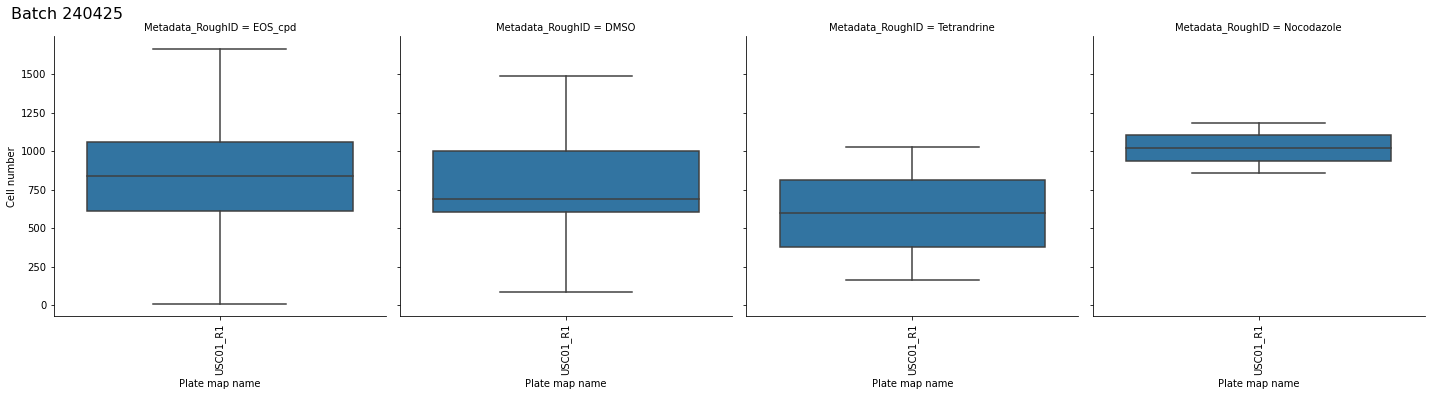

<Figure size 720x720 with 0 Axes>

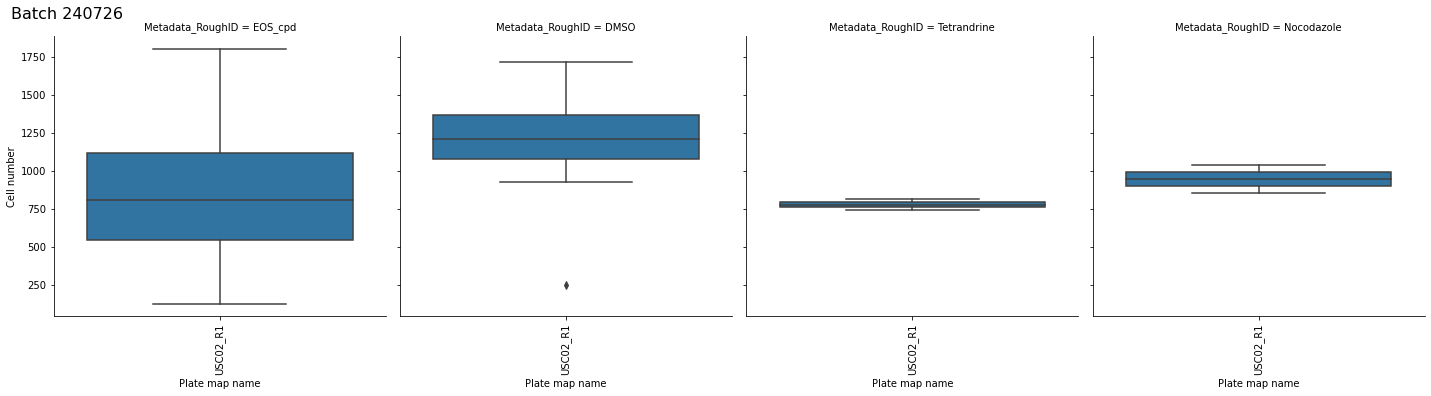

<Figure size 720x720 with 0 Axes>

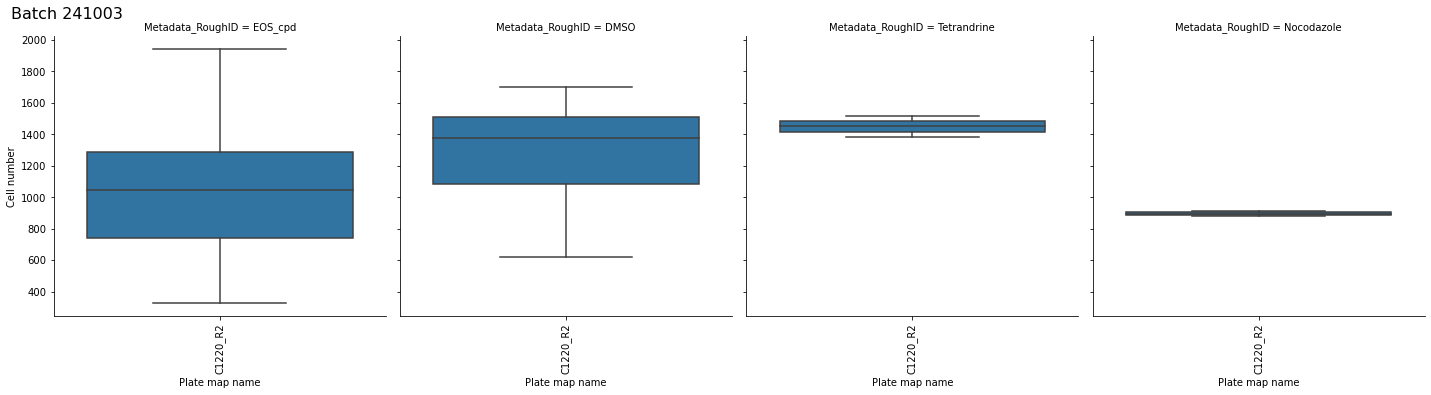

<Figure size 720x720 with 0 Axes>

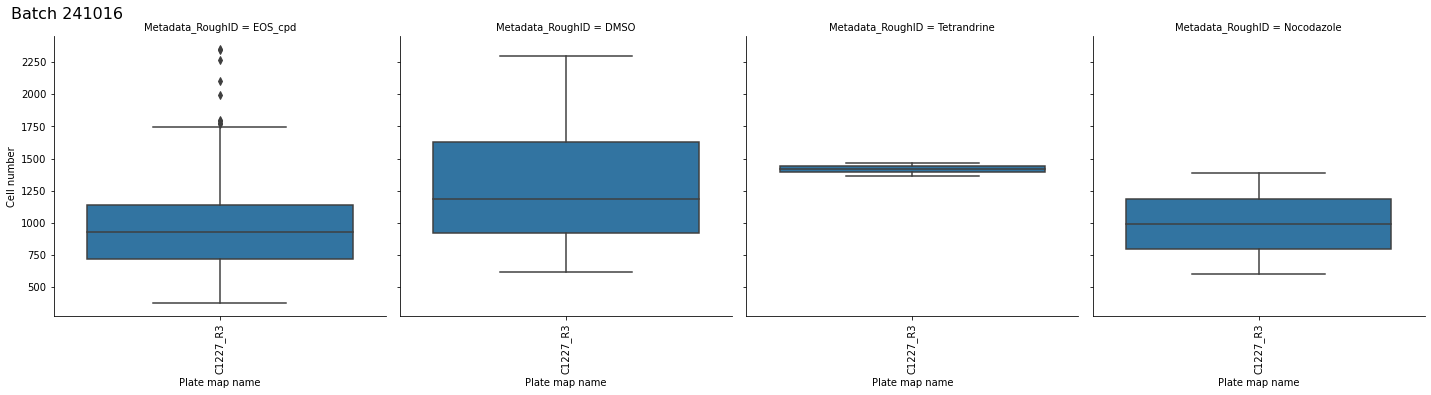

<Figure size 720x720 with 0 Axes>

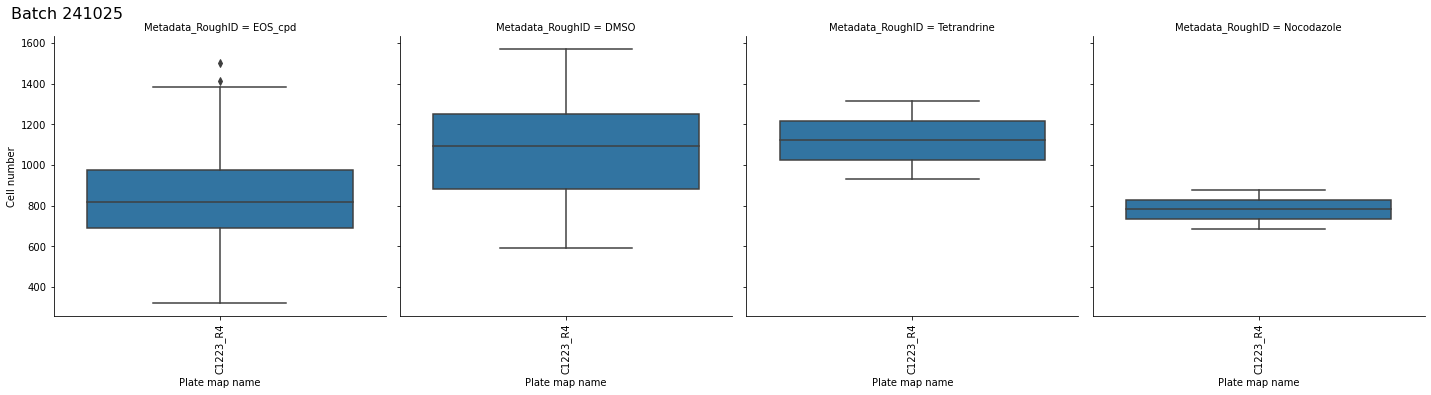

In [31]:
analyze_cell_number('USC')